# Netflix & Spotify: Exploratory Data Analysis (EDA) + Visualizations

**Style:** Jupyter Notebook with Markdown explanations (Option 3)  
**Libraries:** pandas, numpy, matplotlib (no seaborn)  
**Goal:** Tell a clear, insight-driven story with professional charts.

> Replace the file paths below with your local CSVs from Kaggle:
> - `netflix_titles.csv` (Netflix Movies & TV Shows)
> - `tracks.csv` **or** `Spotify_Youtube.csv` (Spotify tracks dataset)

---

## Setup & Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.cluster import KMeans

# Display plots inside notebook
%matplotlib inline

pd.set_option('display.max_colwidth', 120)

## File Paths (edit these)

In [5]:
# >>> EDIT THESE <<<
NETFLIX_CSV = '/Users/owaisali/Desktop/Projects/Jupyter Notebook/DEV (Clg Project)/netflix_titles.csv'
SPOTIFY_CSV = '/Users/owaisali/Desktop/Projects/Jupyter Notebook/DEV (Clg Project)/Spotify_Youtube.csv'

# If your Spotify file is named differently, update SPOTIFY_CSV above.

## Load Data

In [6]:
# Load Netflix
netflix = pd.read_csv(NETFLIX_CSV)
print('Netflix shape:', netflix.shape)
display(netflix.head(10))

# Load Spotify (handle common filename differences)
spotify = pd.read_csv(SPOTIFY_CSV, low_memory=False)
print('Spotify shape:', spotify.shape)
display(spotify.head(10))

Netflix shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshab...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her si..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student a..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor t..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to..."
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri","United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV","A talented batch of amateur bakers face off in a 10-week competition, whipping up their best dishes in the hopes of ..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who'...


Spotify shape: (114000, 21)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


## Light Cleaning / Parsing
We'll standardize a few columns and prepare convenient forms for analysis.

In [7]:
# ---- Netflix parsing ----
netflix = netflix.copy()

# Parse release_year and date_added if present
if 'release_year' in netflix.columns:
    netflix['release_year'] = pd.to_numeric(netflix['release_year'], errors='coerce')

if 'date_added' in netflix.columns:
    netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')

# Split genres ("listed_in") and countries, then explode
def split_and_explode(df, col):
    if col not in df.columns:
        return df.assign(**{col: np.nan})
    df2 = df.copy()
    df2[col] = df2[col].fillna('').astype(str).str.split(',')
    df2 = df2.explode(col)
    df2[col] = df2[col].str.strip()
    return df2

netflix_genres = split_and_explode(netflix, 'listed_in')
netflix_countries = split_and_explode(netflix, 'country')

# ---- Spotify parsing ----
spotify = spotify.copy()

# Track genre column fallback
genre_col = None
for cand in ['track_genre', 'genre', 'playlist_genre', 'Artist_genre', 'artist_genre']:
    if cand in spotify.columns:
        genre_col = cand
        break

# Popularity column fallback
pop_col = None
for cand in ['popularity', 'Popularity']:
    if cand in spotify.columns:
        pop_col = cand
        break

# Audio feature columns (try to detect common ones)
feature_candidates = [
    'danceability','energy','loudness','speechiness','acousticness','instrumentalness',
    'liveness','valence','tempo'
]
audio_features = [c for c in feature_candidates if c in spotify.columns]

print('Detected Spotify genre column:', genre_col)
print('Detected Spotify popularity column:', pop_col)
print('Detected audio features:', audio_features)

Detected Spotify genre column: track_genre
Detected Spotify popularity column: popularity
Detected audio features: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


---

# Netflix Visualizations

### 1) Content Count by Type (Movies vs TV Shows)

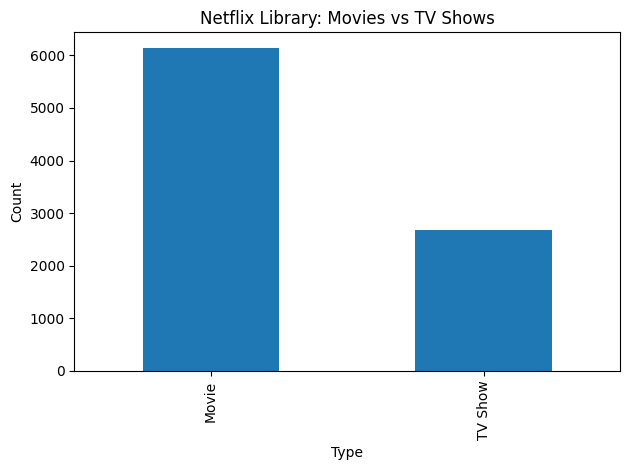

In [8]:
if 'type' in netflix.columns:
    counts = netflix['type'].value_counts().sort_values(ascending=False)
    plt.figure()
    counts.plot(kind='bar')
    plt.title('Netflix Library: Movies vs TV Shows')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'type' not found in Netflix dataset.")

### 2) Top 10 Most Common Genres

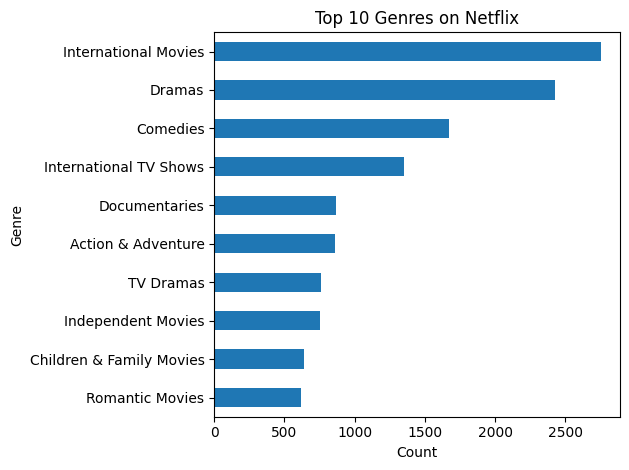

In [9]:
if 'listed_in' in netflix_genres.columns:
    top_genres = (netflix_genres['listed_in']
                  .value_counts()
                  .head(10)
                  .sort_values(ascending=True))
    plt.figure()
    top_genres.plot(kind='barh')
    plt.title('Top 10 Genres on Netflix')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'listed_in' not found for genres.")

### 3) Content Releases Over Time (by Release Year)

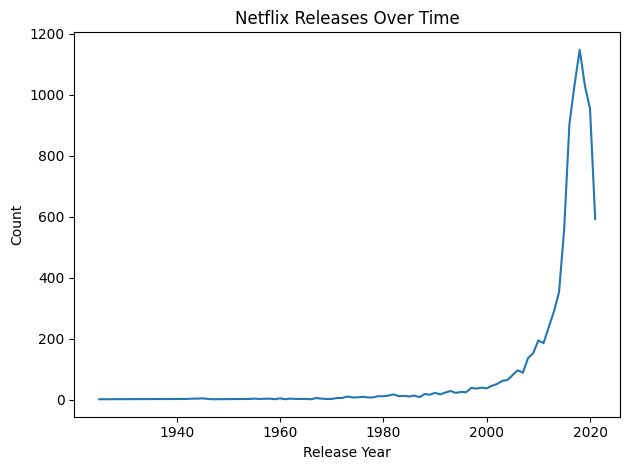

In [10]:
if 'release_year' in netflix.columns:
    year_counts = netflix['release_year'].dropna().astype(int).value_counts().sort_index()
    plt.figure()
    year_counts.plot(kind='line')
    plt.title('Netflix Releases Over Time')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'release_year' not found in Netflix dataset.")

### 4) Country-wise Production (Top 10 Countries)

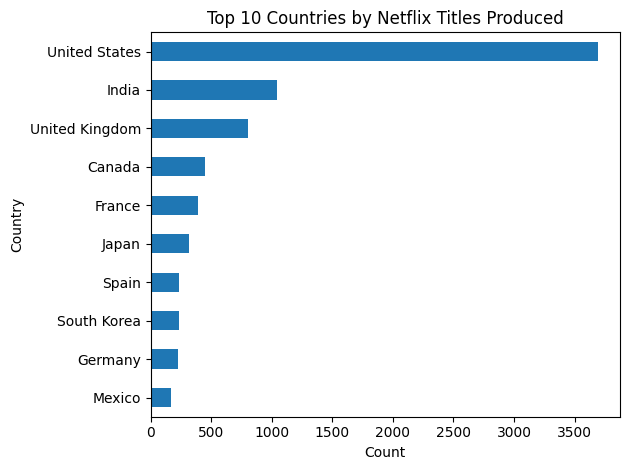

In [11]:
if 'country' in netflix_countries.columns:
    top_countries = (netflix_countries['country']
                     .replace('', np.nan)
                     .dropna()
                     .value_counts()
                     .head(10)
                     .sort_values(ascending=True))
    plt.figure()
    top_countries.plot(kind='barh')
    plt.title('Top 10 Countries by Netflix Titles Produced')
    plt.xlabel('Count')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'country' not found in Netflix dataset.")

### 5) Heatmap: Genres vs Release Year

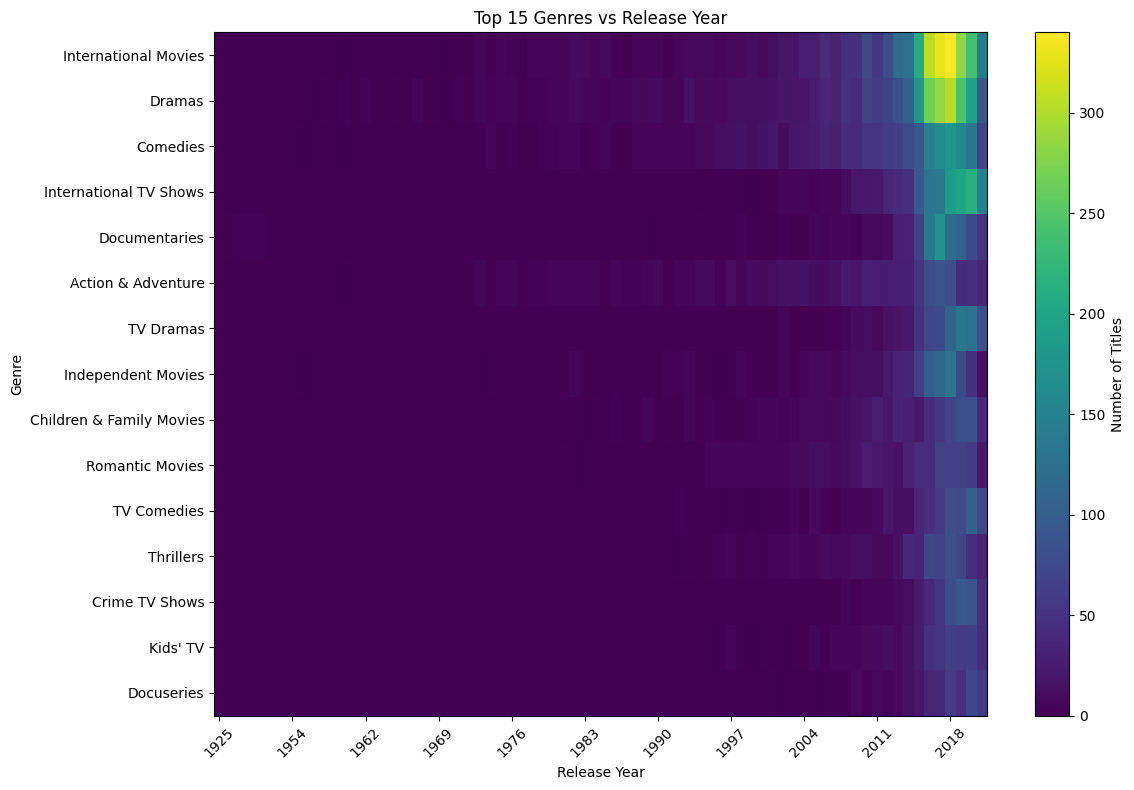

In [14]:
# First create the pivot table for the heatmap
if 'listed_in' in netflix_genres.columns and 'release_year' in netflix.columns:
    # Create pivot table of genres vs years
    tmp = netflix_genres[['listed_in','release_year']].dropna()
    tmp['release_year'] = tmp['release_year'].astype(int)
    pivot = tmp.groupby(['listed_in','release_year']).size().unstack(fill_value=0)
    
    # Get top N genres for cleaner visualization
    N = 15  # Adjust this number to show more/fewer genres
    top_rows = pivot.sum(axis=1).sort_values(ascending=False).head(N).index
    heat_small = pivot.loc[top_rows]
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(heat_small.values, aspect='auto', cmap='viridis')
    plt.title(f'Top {N} Genres vs Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Genre')

    # X-axis (years)
    years = heat_small.columns
    step = max(1, len(years) // 10)  # Show ~10 year labels
    plt.xticks(np.arange(0, len(years), step), years[::step], rotation=45)

    # Y-axis (genres)
    plt.yticks(np.arange(heat_small.shape[0]), heat_small.index)
    
    plt.colorbar(label='Number of Titles')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns (listed_in, release_year) not found for heatmap.")

---

# Spotify Visualizations

### 6) Distribution of Audio Features
*(Each feature gets its own chart — no subplots used)*

In [ ]:
import time

for feat in audio_features:
    plt.figure()
    spotify[feat].dropna().plot(kind='hist', bins=40)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    time.sleep(0.5)   # <-- Add delay


### 7) Danceability vs Energy (Scatter)

In [ ]:
x_col, y_col = None, None
if 'danceability' in audio_features:
    x_col = 'danceability'
if 'energy' in audio_features:
    y_col = 'energy'

if x_col and y_col:
    plt.figure()
    plt.scatter(spotify[x_col], spotify[y_col], alpha=0.3, s=10)
    plt.title('Danceability vs Energy')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.tight_layout()
    plt.show()
else:
    print("danceability/energy not found among audio features.")

### 8) Average Popularity by Genre (Top 15)

In [ ]:
if genre_col and pop_col:
    pop_by_genre = (spotify[[genre_col, pop_col]]
                    .dropna(subset=[genre_col, pop_col])
                    .groupby(genre_col)[pop_col].mean()
                    .sort_values(ascending=False)
                    .head(15)
                    .sort_values(ascending=True))
    plt.figure()
    pop_by_genre.plot(kind='barh')
    plt.title('Average Popularity by Genre (Top 15)')
    plt.xlabel('Average Popularity')
    plt.ylabel('Genre')
    plt.tight_layout()
    plt.show()
else:
    print("Genre and/or popularity columns not found in Spotify dataset.")

### 9) Correlation Heatmap of Audio Features

In [ ]:
if len(audio_features) >= 2:
    corr = spotify[audio_features].corr(numeric_only=True)
    plt.figure()
    plt.imshow(corr.values, aspect='auto', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap (Audio Features)')
    plt.xticks(ticks=np.arange(corr.shape[1]), labels=corr.columns, rotation=90)
    plt.yticks(ticks=np.arange(corr.shape[0]), labels=corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough audio features to compute correlation.")

### 10) K-Means Clustering for Mood Groups (Optional)
We cluster on two intuitive features (danceability & energy).  
If either is missing, the cell will explain.

In [ ]:
if {'danceability','energy'}.issubset(set(spotify.columns)):
    X = spotify[['danceability','energy']].dropna().clip(0, 1)  # both 0..1 in most datasets
    # Choose k heuristically; feel free to tune
    k = 4
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)

    plt.figure()
    plt.scatter(X['danceability'], X['energy'], c=labels, s=10, alpha=0.4)
    plt.title('K-Means Clusters: Mood Groups (danceability vs energy)')
    plt.xlabel('danceability')
    plt.ylabel('energy')
    plt.tight_layout()
    plt.show()
else:
    print("danceability and/or energy not found; skipping K-Means demo.")

---

## Notes for Your Portfolio
- Keep only the best 6–8 charts in the final report.
- Add short bullets under each chart explaining *why* the insight matters.
- If you want an interactive app later, convert the best visuals into a Streamlit app.